<a href="https://colab.research.google.com/github/GiulianoPepato/university-codes/blob/main/EP4-C%C3%A1lc_Num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I

Valores verdadeiros: y(6) = 252 e z(6) = 120
Valores pelo método de Euler: y_e(6) = 51.20678939375407 e z_e(6) = -204.56455797601302
Valores pelo método RK4: y_rk4(6) = 251.9999825861282 e z_rk = 119.99997182195537


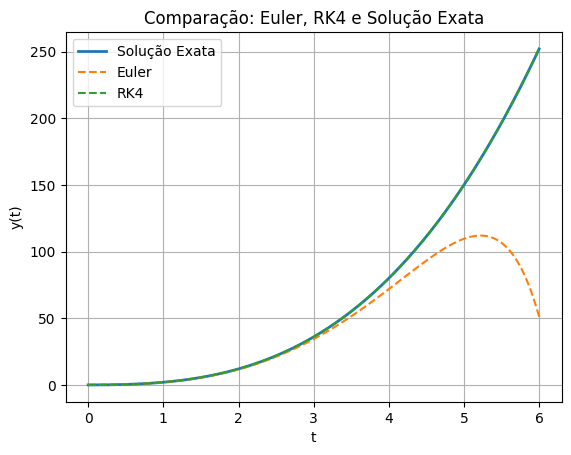

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t, y, z):
    dy = z
    dz = z + y - t**3 - 4*t**2 + 4*t + 2
    return dy, dz

h = 0.01
t0 = 0
tf = 6
N = int((tf - t0) / h)
t = np.linspace(t0, tf, N+1)


y_e = np.zeros(N+1)
z_e = np.zeros(N+1)


y_rk = np.zeros(N+1)
z_rk = np.zeros(N+1)



# ---- Método de Euler ----
for i in range(N):
    dy, dz = f(t[i], y_e[i], z_e[i])
    y_e[i+1] = y_e[i] + h * dy
    z_e[i+1] = z_e[i] + h * dz


# ---- Método de Runge–Kutta 4 (RK4) ----
def g(t, y, z):
    return z + y - t**3 - 4*t**2 + 4*t + 2

for i in range(N):
    k1y = h * z_rk[i]
    k1z = h * g(t[i], y_rk[i], z_rk[i])

    k2y = h * (z_rk[i] + k1z/2)
    k2z = h * g(t[i] + h/2, y_rk[i] + k1y/2, z_rk[i] + k1z/2)

    k3y = h * (z_rk[i] + k2z/2)
    k3z = h * g(t[i] + h/2, y_rk[i] + k2y/2, z_rk[i] + k2z/2)

    k4y = h * (z_rk[i] + k3z)
    k4z = h * g(t[i] + h, y_rk[i] + k3y, z_rk[i] + k3z)

    y_rk[i+1] = y_rk[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
    z_rk[i+1] = z_rk[i] + (k1z + 2*k2z + 2*k3z + k4z)/6



y_exact = t**3 + t**2
print(f'Valores verdadeiros: y(6) = {6**3+6**2} e z(6) = {3*(6**2)+2*6}')
print(f'Valores pelo método de Euler: y_e(6) = {y_e[-1]} e z_e(6) = {z_e[-1]}')
print(f'Valores pelo método RK4: y_rk4(6) = {y_rk[-1]} e z_rk = {z_rk[-1]}')


plt.figure()
plt.plot(t, y_exact, label="Solução Exata", linewidth=2)
plt.plot(t, y_e, "--", label="Euler")
plt.plot(t, y_rk, "--", label="RK4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparação: Euler, RK4 e Solução Exata")
plt.grid()
plt.legend()
plt.show()

#II Eu

##a

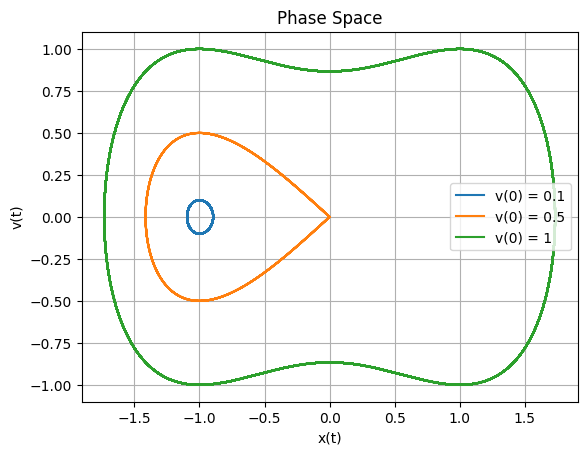

In [2]:
def fIIa(t,x,v):
  return x*(1-x**2)/2

def RK4(t,x,v,f, N, h): #x e v em condições iniciais aplicadas e g = dx e f = dv
  for i in range(N):
    k_1x = h*v[i]
    k_1v = h*f(t[i],x[i],v[i])

    k_2x = h*(v[i]+k_1v/2)
    k_2v = h*f(t[i]+h/2, x[i]+k_1x/2, v[i]+k_1v/2)

    k_3x = h*(v[i]+k_2v/2)
    k_3v = h*f(t[i]+h/2, x[i]+k_2x/2, v[i]+k_2v/2)

    k_4x = h*(v[i]+k_3v)
    k_4v = h*f(t[i]+h/2, x[i]+k_3x, v[i]+k_3v)

    x[i+1] = x[i] + (k_1x + 2*k_2x + 2*k_3x + k_4x)/6
    v[i+1] = v[i] + (k_1v + 2*k_2v + 2*k_3v + k_4v)/6

  return x, v

def phasespace(x, v, ic):
  plt.figure()
  plt.plot(x, v)
  plt.xlabel('x(t)')
  plt.ylabel('y(t)')
  plt.title(f"Phase Space for v(0) = {ic}")
  plt.grid()
  plt.legend()
  plt.show()


t0 = 0
tf = 250
h = 0.01
N = int((tf-t0)/h)
t = np.linspace(t0, tf, N+1)

x = np.zeros(N+1)
x[0] = -1


plt.figure()
for ic in [0.1, 0.5, 1]:
  v = np.zeros(N+1)
  v[0] = ic
  x, v = RK4(t=t, x=x, v=v, f=fIIa, N=N, h=h)
  plt.plot(x, v, label = f'v(0) = {ic}')
  # phasespace(x=x, v=v, ic=ic)

plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title('Phase Space')
plt.grid()
plt.legend()
plt.show()

##b

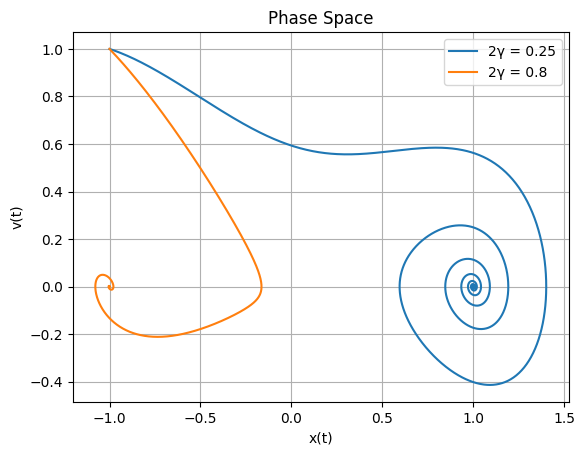

In [3]:
def fIIb(t,x,v):
  return x*(1-x**2)/2 - tg*v



plt.figure()
for twogamma in [0.25, 0.8]:
  x = np.zeros(N+1)
  v = np.zeros(N+1)

  x[0] = -1
  v[0] = 1

  tg = twogamma
  x, v = RK4(t=t, x=x, v=v, f=fIIb, N=N, h=h)
  plt.plot(x, v, label = f'2γ = {tg}')

plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title(f"Phase Space")
plt.legend()
plt.grid()
plt.show()

##c

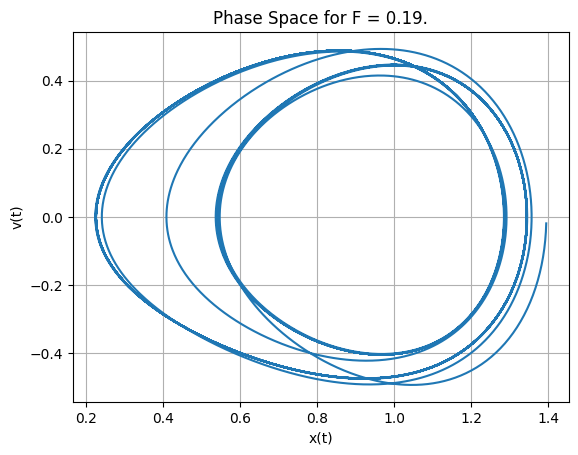

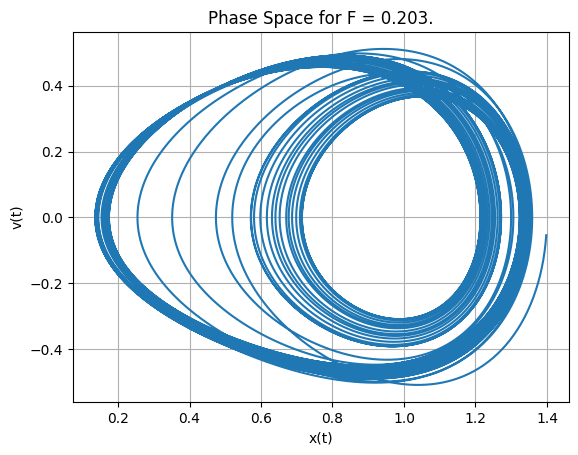

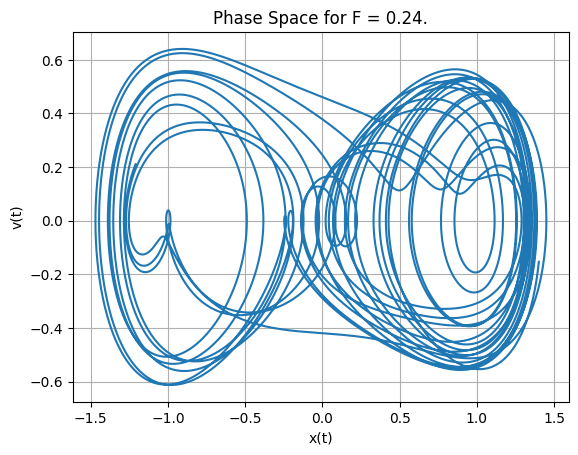

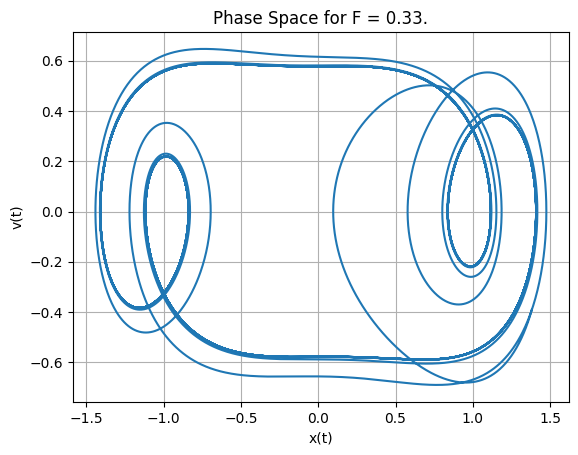

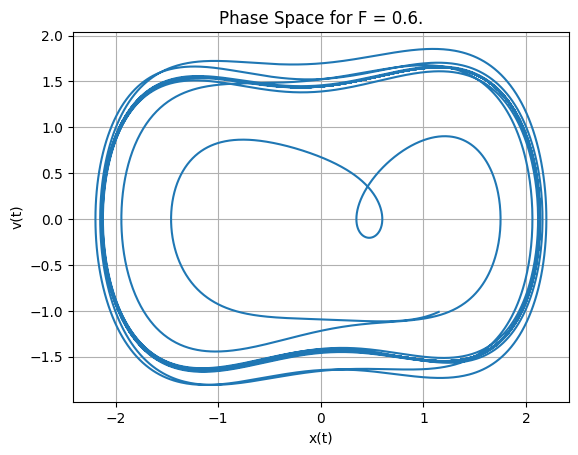

In [4]:
def fIIc(t,x,v):
  return F*np.cos(0.95*t) + 0.5*x*(1-x**2) - 0.25*v

def x_after_transient(input_array):
  max_index = np.argmax(input_array)
  return input_array[max_index:], max_index



for F in [0.19, 0.203, 0.24, 0.33, 0.6]:
  x = np.zeros(N+1)
  v = np.zeros(N+1)

  x[0] = -1
  v[0] = 1

  x, v = RK4(t=t, x=x, v=v, f=fIIc, N=N, h=h)
  mi = 350
  x = x[mi:]
  v = v[mi:]
  plt.figure()
  plt.plot(x, v)
  plt.title(f'Phase Space for F = {F}.')
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  plt.show()
  print('')

#Questão 2)

In [19]:
import numba
from numba import jit
import numpy as np

n = int(7/0.0005)
omega  = 0.95

@jit(nopython=True)
def fIIc(t,x,v, F):
  return F*np.cos(0.95*t) + 0.5*x*(1-x**2) - 0.25*v

@jit(nopython=True)
def RK4_v2(t,x,v,f, h, F): # Added h_val and F_current
  k_1x = h*v
  k_1v = h*f(t,x,v, F) # Pass F_current to f

  k_2x = h*(v+k_1v/2)
  k_2v = h*f(t+h/2, x+k_1x/2, v+k_1v/2, F)

  k_3x = h*(v+k_2v/2)
  k_3v = h*f(t+h/2, x+k_2x/2, v+k_2v/2, F)

  k_4x = h*(v+k_3v)
  k_4v = h*f(t+h, x+k_3x, v+k_3v, F)

  x +=  (k_1x + 2*k_2x + 2*k_3x + k_4x)/6
  v += (k_1v + 2*k_2v + 2*k_3v + k_4v)/6
  t += h
  return x, v, t



@jit(nopython=True)
def poicare_map(n = n, omega = omega):
  forces =  np.linspace(0,7, n+1)
  bifurcation_x = []

  for F in forces:
    t=0
    x, v = -1, 1
    h = 0.01*2*np.pi/omega
    for _ in range(200000):
      x, v, t = RK4_v2(t=t, x=x, v=v, f = fIIc, h=h, F=F)
    h = 0.001*2*np.pi/omega
    for i in range(100):
      for j in range(1000):
        x, v, t = RK4_v2(t=t, x=x, v=v, f = fIIc, h=h, F=F)
      bifurcation_x.append((F, x))
  return bifurcation_x


bifurcation_x = poicare_map()
# Separar os dados para plotagem
F_plot = [point[0] for point in bifurcation_x]
x_plot = [point[1] for point in bifurcation_x]

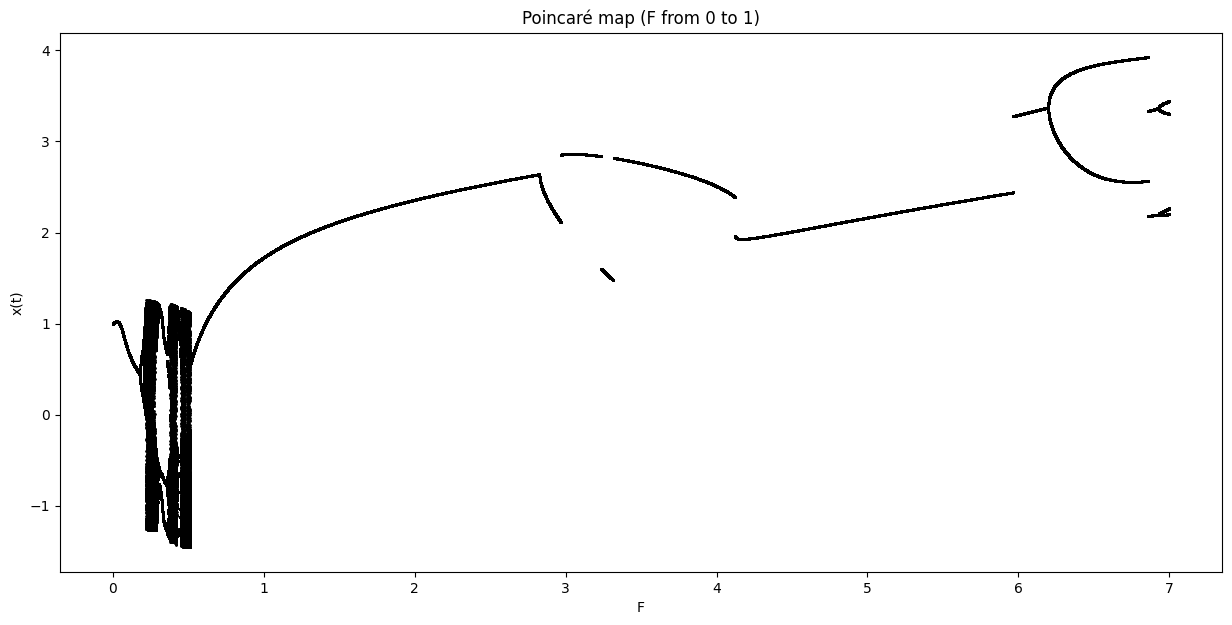

In [15]:
plt.figure(figsize=(15, 7))
plt.scatter(F_plot, x_plot, marker='o', s=1, color='black')
plt.xlabel('F')
plt.ylabel('x(t)')
plt.title('Poincaré map (F from 0 to 1)')
plt.show()

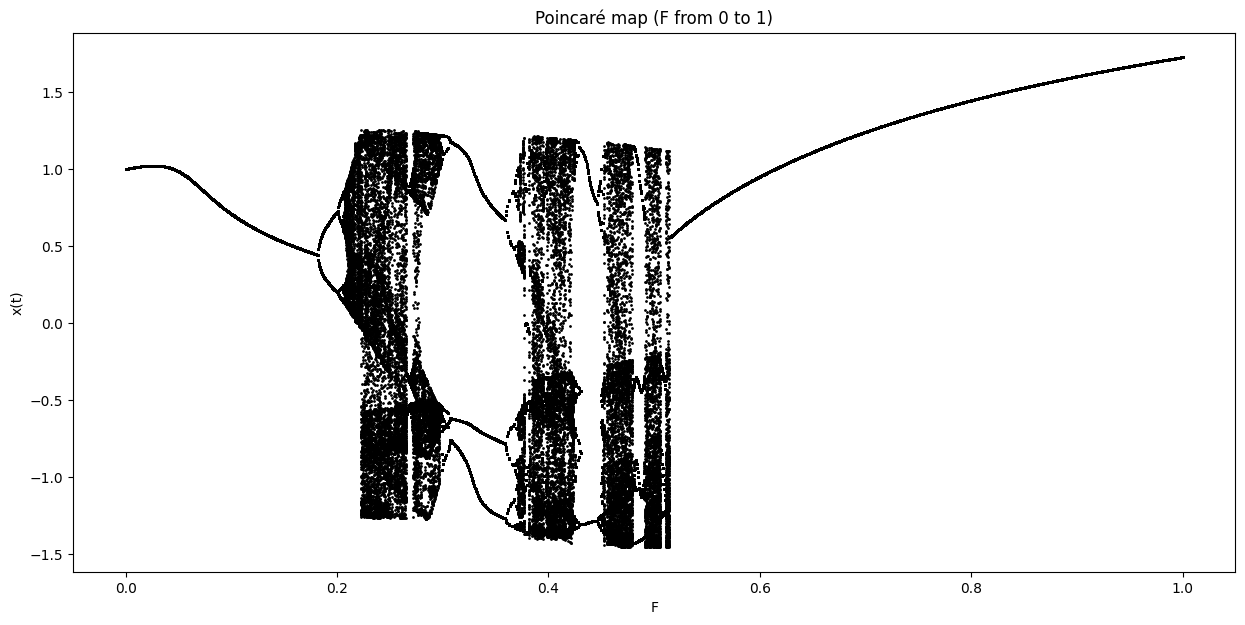

In [16]:
plt.figure(figsize=(15, 7))

# Filter data for F between 0 and 1
F_filtered = []
x_filtered = []
for i in range(len(F_plot)):
    if 0 <= F_plot[i] <= 1:
        F_filtered.append(F_plot[i])
        x_filtered.append(x_plot[i])


plt.scatter(F_filtered, x_filtered, marker='o', s=1, color='black')
plt.xlabel('F')
plt.ylabel('x(t)')
plt.title('Poincaré map (F from 0 to 1)')
plt.show()

#Questão 3)

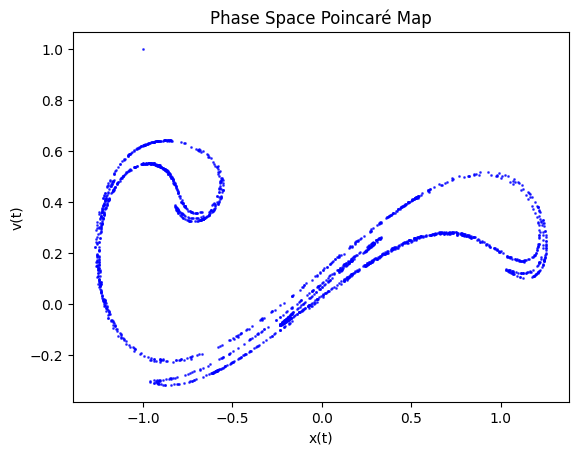

In [18]:
@jit(nopython=True)
def phase_space(n = n, omega = omega):
  F = 0.24
  x, v, t = -1, 1, 0
  X = [-1]
  V = [1]
  h = 0.01*2*np.pi/omega
  for _ in range(200000):
    x, v, t = RK4_v2(t=t, x=x, v=v, f = fIIc, h=h, F=F)
  h = 0.001*2*np.pi/omega
  for i in range(2000):
    for j in range(1000):
      x, v, t = RK4_v2(t=t, x=x, v=v, f = fIIc, h=h, F=F)
    X.append(x)
    V.append(v)
  return X, V

X, V = phase_space()

plt.figure()
plt.scatter(X, V, marker = 'o', s=1, color = 'blue', alpha = 0.68)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title('Phase Space Poincaré Map')
plt.show()